import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.model_selection as LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder    



import the dataframe

In [2]:
HouseData = pd.read_csv('data.csv')

In [3]:
HouseData.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

remove columns - country and date

In [5]:
del HouseData['country']
del HouseData['date']
del HouseData['yr_built']
del HouseData['yr_renovated']
del HouseData['sqft_lot']
del HouseData['waterfront']
del HouseData['condition']

This dataframe needs OneHotEncoding as a feature is in string format and it is an important feature

In [6]:
HouseData.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip
0,313000.0,3.0,1.50,1340,1.5,0,1340,0,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,2.0,4,3370,280,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,1.0,0,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,1000,1000,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,1140,800,9105 170th Ave NE,Redmond,WA 98052


In [7]:
HouseData['price'] = HouseData['price'].astype('int64')
HouseData['bedrooms'] = HouseData['bedrooms'].astype('int64')
HouseData['bathrooms'] = HouseData['bathrooms'].apply(lambda x: int(x)+1 if x > int(x) else int(x))
HouseData['floors'] = HouseData['floors'].apply(lambda x: int(x)+1 if x > int(x) else int(x))



In [8]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          4600 non-null   int64 
 1   bedrooms       4600 non-null   int64 
 2   bathrooms      4600 non-null   int64 
 3   sqft_living    4600 non-null   int64 
 4   floors         4600 non-null   int64 
 5   view           4600 non-null   int64 
 6   sqft_above     4600 non-null   int64 
 7   sqft_basement  4600 non-null   int64 
 8   street         4600 non-null   object
 9   city           4600 non-null   object
 10  statezip       4600 non-null   object
dtypes: int64(8), object(3)
memory usage: 395.4+ KB


In [9]:
HouseData.shape

(4600, 11)

lets build a model using all the features and then compare it with another model after some processing

1

In [10]:
HouseData.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.491304,2139.346957,1.56500,0.240652,1827.265435,312.081522
std,5.638347e+05,0.908848,0.933265,963.206916,0.56739,0.778405,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,1.00000,0.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,2.000000,1460.000000,1.00000,0.000000,1190.000000,0.000000
50%,4.609430e+05,3.000000,3.000000,1980.000000,2.00000,0.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,3.000000,2620.000000,2.00000,0.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,4.00000,4.000000,9410.000000,4820.000000


In [11]:
HouseData = HouseData[HouseData['price'] < 5000000]

In [12]:
correlation1 = HouseData.corr()

C:\Users\koush\AppData\Local\Temp\ipykernel_4176\2130111599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1 = HouseData.corr()


Plot a heatmap of the correlation matrix

<AxesSubplot: >

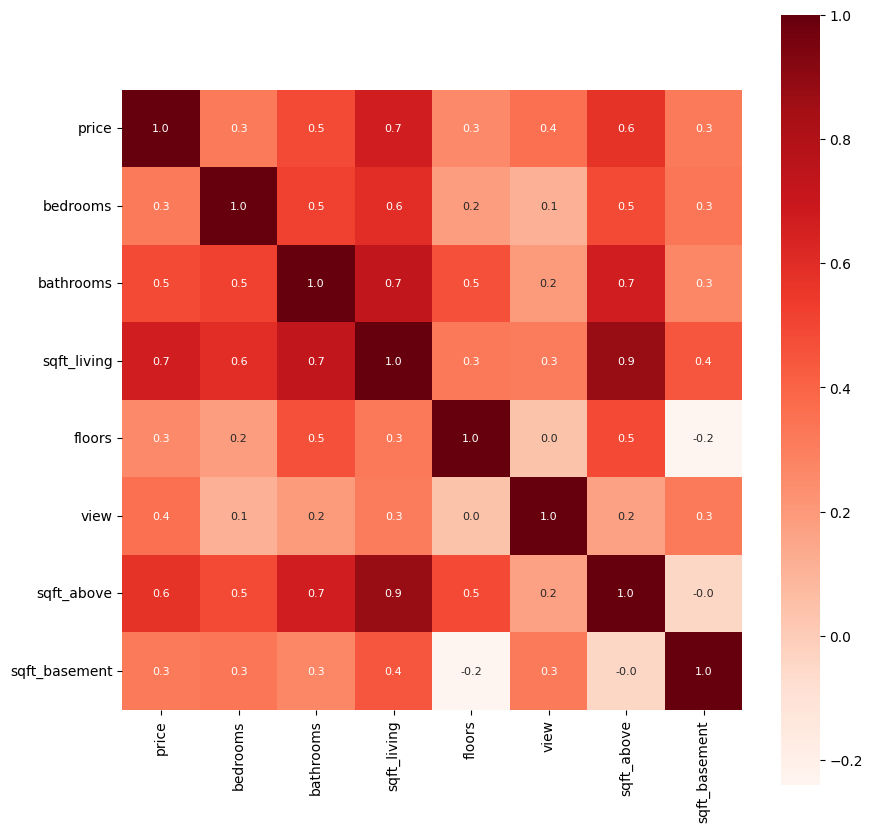

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation1, cbar= True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Reds')

Split the data into Training and test

In [14]:
X = HouseData.drop(columns=['price'],axis = 1)
Y = HouseData['price']

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

print the splitted data size

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(4597, 10) (3677, 10) (920, 10)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1248 to 235
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       3677 non-null   int64 
 1   bathrooms      3677 non-null   int64 
 2   sqft_living    3677 non-null   int64 
 3   floors         3677 non-null   int64 
 4   view           3677 non-null   int64 
 5   sqft_above     3677 non-null   int64 
 6   sqft_basement  3677 non-null   int64 
 7   street         3677 non-null   object
 8   city           3677 non-null   object
 9   statezip       3677 non-null   object
dtypes: int64(7), object(3)
memory usage: 316.0+ KB


In [18]:
ohe = OneHotEncoder()
ohe.fit(X[['street','city','statezip']])

OneHotEncoder()

In [19]:
ohe.categories_

[array(['1 View Ln NE', '10 W Etruria St', '100 20th Ave E', ...,
        'Tolt Pipeline Trail', 'Trossachs Blvd SE', 'Valley View Trail'],
       dtype=object),
 array(['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue',
        'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill',
        'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City',
        'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore',
        'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
        'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
        'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
        'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
        'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
        'Woodinville', 'Yarrow Point'], dtype=object),
 array(['WA 98001', 'WA 98002', 'WA 98003', 'WA 98004', 'WA 98005',
        'WA 98006', 'WA 98007', 'WA 98008', 'WA 98010', 'WA 98011',
        'WA 98014', 'WA 9

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [21]:
col_transform = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['street','city','statezip']), remainder='passthrough')


In [22]:
lr = LinearRegression()

In [23]:
pipeline = make_pipeline(col_transform,lr)

In [24]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1 View Ln NE', '10 W Etruria St', '100 20th Ave E', ...,
       'Tolt Pipeline Trail', 'Trossachs Blvd SE', 'Valley View Trail'],
      dtype=object),
                                                                            array(['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue',
       'Black Diamond', 'Bothell', 'Burien', 'C...
       'WA 98107', 'WA 98108', 'WA 98109', 'WA 98112', 'WA 98115',
       'WA 98116', 'WA 98117', 'WA 98118', 'WA 98119', 'WA 98122',
       'WA 98125', 'WA 98126', 'WA 98133', 'WA 98136', 'WA 98144',
       'WA 98146', 'WA 98148', 'WA 98155', 'WA 98166', 'WA 98168',
       'WA 98177', 'WA 98178', 'WA 98188', 'WA 98198', 'WA 98199',
       'WA 98288', 'WA 98354'], dtype=object)]),
                                                  ['street', 'city',
                                                   'statezip'])])),
                ('linearregression', LinearRegression())])

In [25]:
X_test.head()

,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip
1973,3,2,1180,1,0,800,380,2522 230th Ave NE,Sammamish,WA 98074
3812,3,3,3280,1,0,1680,1600,3842 NE 92nd St,Seattle,WA 98115
4430,3,2,2930,1,0,2030,900,12542 NE 160th Pl,Woodinville,WA 98072
795,5,1,1460,2,0,1460,0,13012 41st Ave S,Tukwila,WA 98168
808,3,2,2180,1,0,1100,1080,4111 Woodland Park Ave N,Seattle,WA 98103


In [26]:
results = pipeline.predict(X_test)

In [27]:
result1 = pipeline.predict(X_train)

In [28]:
r2_score(Y_train,result1)

0.9811358617241158

In [29]:
r2_score(Y_test,results)

0.6889037466934637

Hurray!! I made a model with accuracy 70.9

In [30]:
output = pd.read_csv("output.csv")

In [31]:
output.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [32]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [33]:
output['price'] = output['price'].astype('int64')
output['bedrooms'] = output['bedrooms'].astype('int64')
output['bathrooms'] = output['bathrooms'].apply(lambda x: int(x)+1 if x > int(x) else int(x))
output['floors'] = output['floors'].apply(lambda x: int(x)+1 if x > int(x) else int(x))



In [34]:
del output['country']
del output['date']
del output['yr_built']
del output['yr_renovated']
del output['sqft_lot']
del output['waterfront']
del output['condition']

In [35]:
output = output[output['street'] != '5426 40th Ave W']
output = output[output['street'] != '4442 95th Ave NE']
output = output[output['street'] != '12005 SE 219th Ct']

In [36]:
output_Y = output['price']
output_X = output.drop(columns=['price'],axis = 1)

In [37]:
output_X.shape

(4597, 10)

Removing these values in street column ['5426 40th Ave W', '4442 95th Ave NE' '12005 SE 219th Ct']

In [38]:
output_result = pipeline.predict(output_X)

In [39]:
r2_score(output_Y,output_result)

0.9301570383162631

Got 93.01 accuracy on new data